In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import normalize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df["bathrooms"] = pd.Series(df['bathrooms'], dtype='int32')

In [4]:
df.bathrooms.value_counts()

2    10542
1     8355
3     2228
4      338
0       86
5       48
6       12
8        2
7        2
Name: bathrooms, dtype: int64

### Extracting some informations from the dataset 

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int32  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [8]:
df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [9]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [10]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
# checking null values in the dataset
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


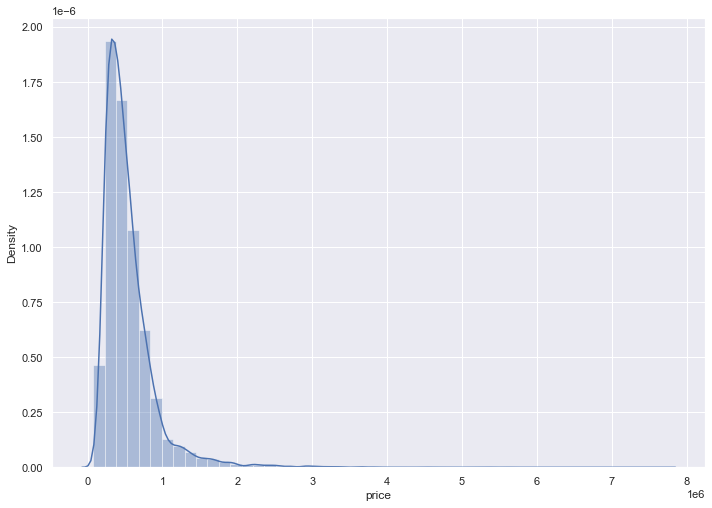

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['price']);

in this graph we represented the distribution of the house pricing :
* we notice the the curve is inclined to the left due to the average price and outiliers 

c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

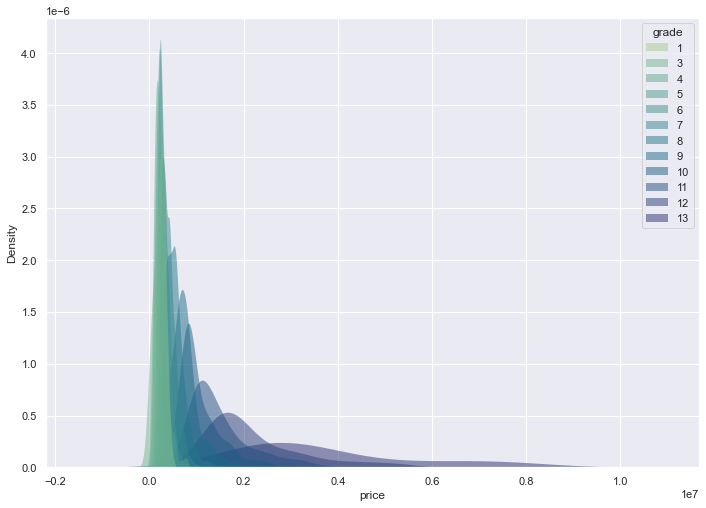

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(data=df, x="price", hue="grade", palette="crest", fill=True,alpha=.5, linewidth=0,common_norm=False)

in this graph we represented the distribution of grade by the house price
* we can notice that when the grade descreases the house pricing increases this make sense because the first grade represents a luxury house. 

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

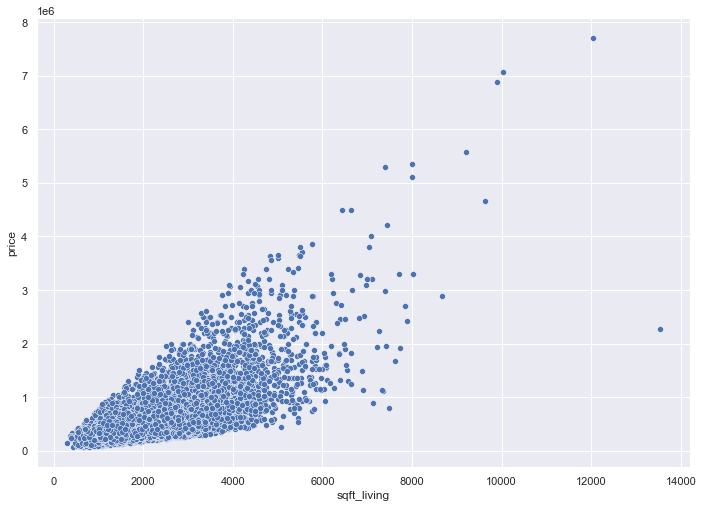

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='sqft_living', y='price', data=df)


In this graph, we have plotted the distribution of sqft_living according to house price. 
* we can notice that we have some outliers  
* when sqft_living (square footage of the home) increases, house prices increase. 

<AxesSubplot:xlabel='grade', ylabel='price'>

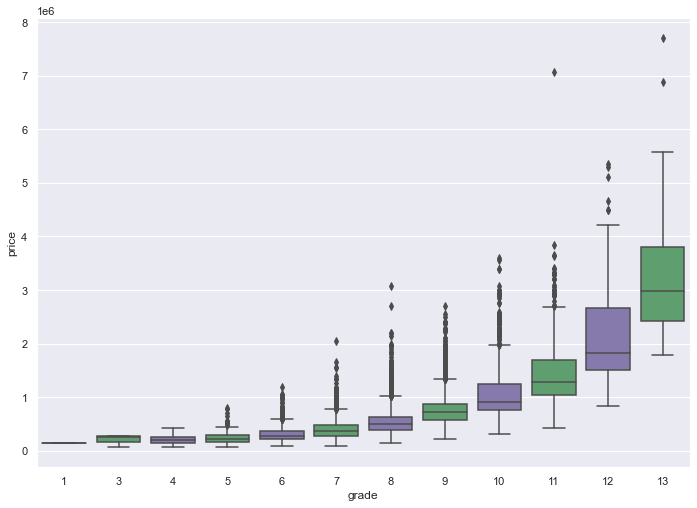

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="grade", y="price",
            palette=["m", "g"],
            data=df)

In this graph, we used boxplots to detect outliers of grade versus price. 
* we notice that we have many outliers starting by the  6th grade

<AxesSubplot:xlabel='waterfront', ylabel='price'>

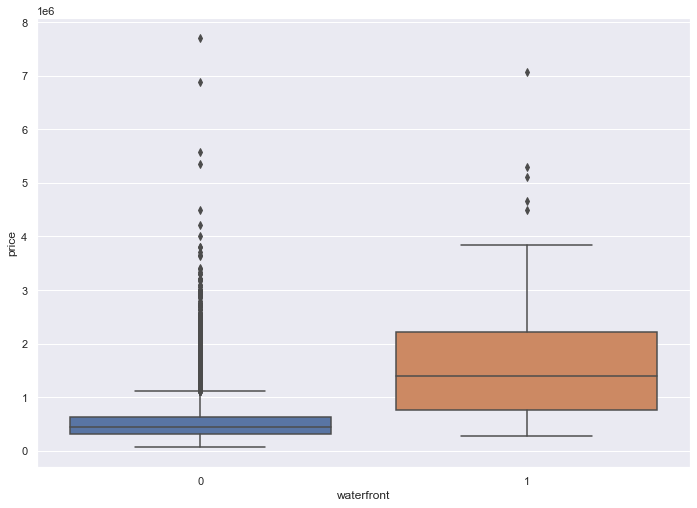

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x="waterfront", y="price", data=df)

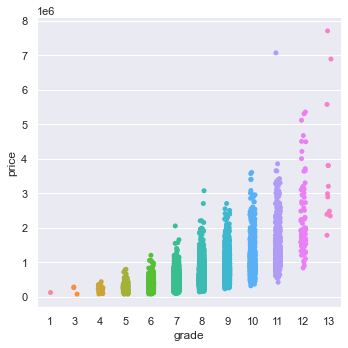

In [20]:

sns.catplot(data=df, x="grade", y="price")

c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


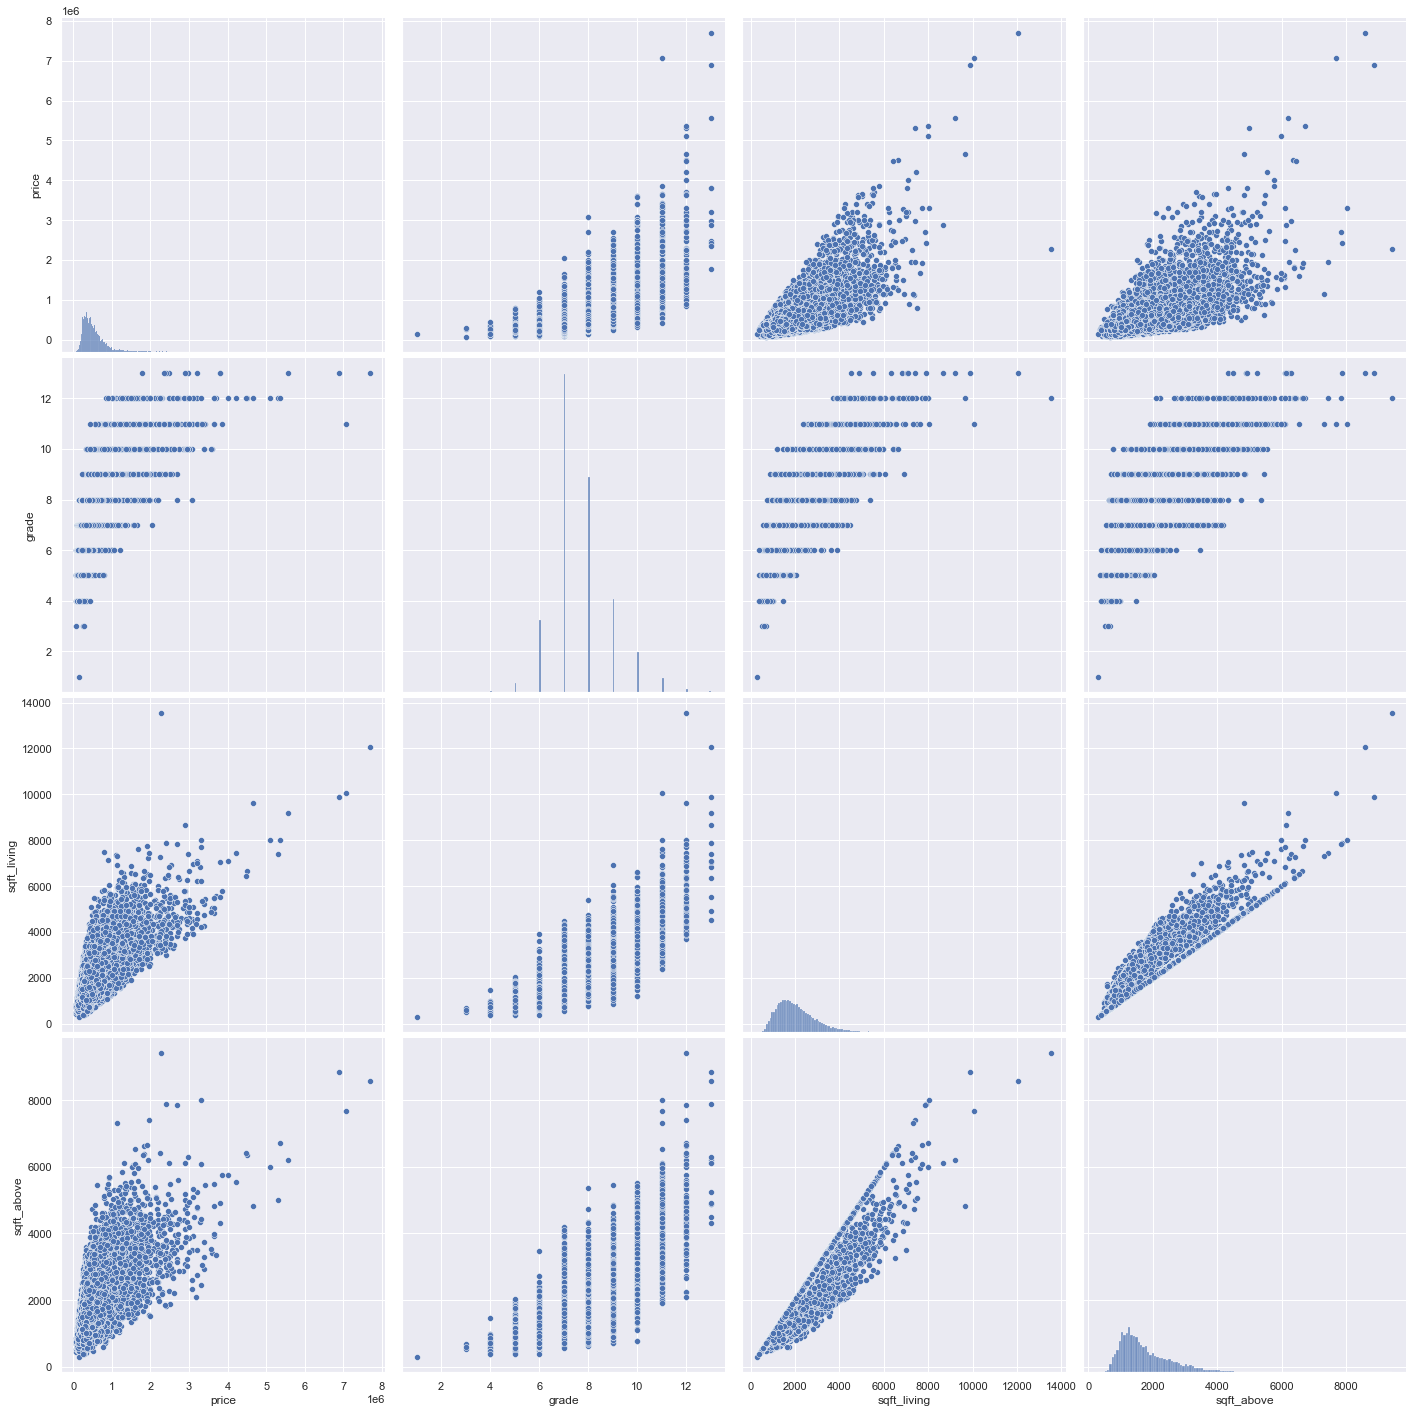

In [21]:
cols = ['price', 'grade', 'sqft_living', 'sqft_above']
sns.pairplot(df[cols], size = 5);

In [252]:
df.corr()['price'].sort_values() > 0.65

zipcode          False
id               False
long             False
condition        False
yr_built         False
sqft_lot15       False
sqft_lot         False
yr_renovated     False
floors           False
waterfront       False
lat              False
bedrooms         False
sqft_basement    False
view             False
bathrooms        False
sqft_living15    False
sqft_above       False
grade             True
sqft_living       True
price             True
Name: price, dtype: bool

## feature selecting

In [20]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 18 , 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 13 }

        )

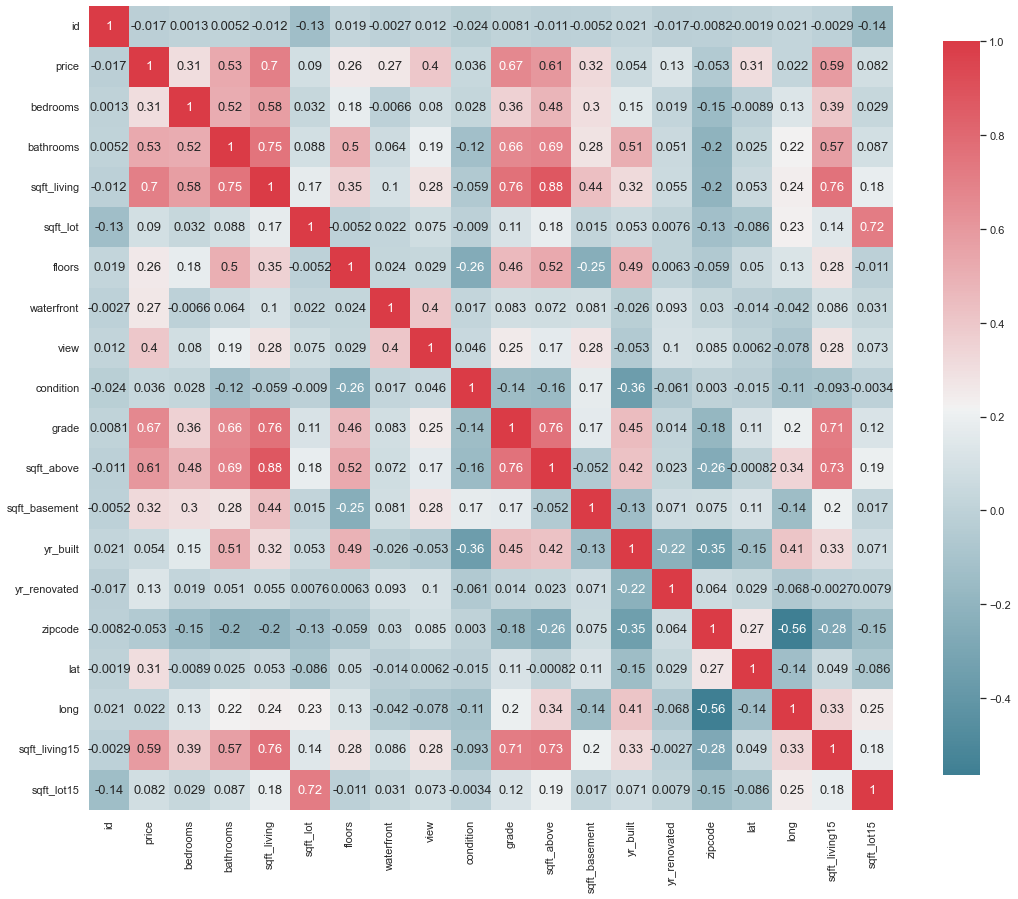

In [216]:
plot_correlation_map(df)

to choose the right features i checked the correlation of the features with its target price 
* i choose the highly correlated ones in our case : `Grade and sqft_living`  are highly correlated 

In [246]:
X = df[["sqft_living"]]
Y = df[["price"]]

In [247]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [248]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15129, 1)
(6484, 1)
(15129, 1)
(6484, 1)


In [249]:
clf = LinearRegression(fit_intercept=False)
#train model
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
rsq1 = clf.score(X_train,Y_train)
rmse1 = np.sqrt(metrics.mean_squared_error(Y_train, clf.predict(X_train)))
print(rsq1,rmse1)

0.36402441367385296 288249.21365373174


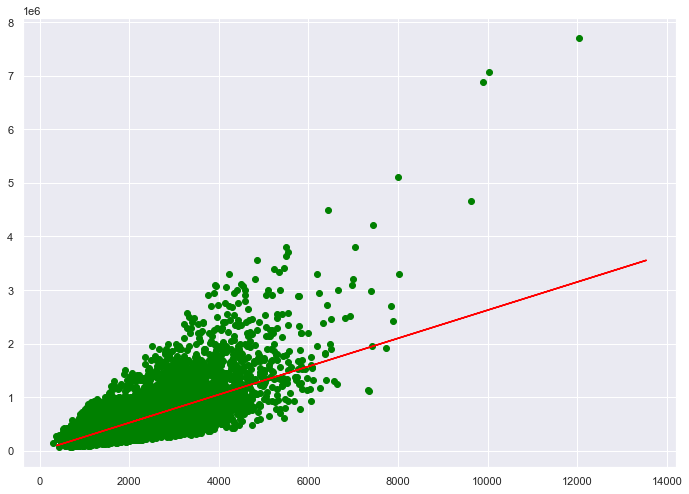

In [137]:
plt.scatter(X_train,Y_train, color='green')
plt.plot(X_test, Y_pred, color='red')

## train the model with anither feature "grade"

In [138]:
# train the model with anither feature "grade"
X = df[["grade"]]
Y = df[["price"]]

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [140]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15129, 1)
(6484, 1)
(15129, 1)
(6484, 1)


In [141]:
clf = LinearRegression()
#train model
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
rsq1 = clf.score(X_train,Y_train)
rmse1 = np.sqrt(metrics.mean_squared_error(Y_train, clf.predict(X_train)))
print(rsq1,rmse1)

0.4459188109550897 269051.00096564024


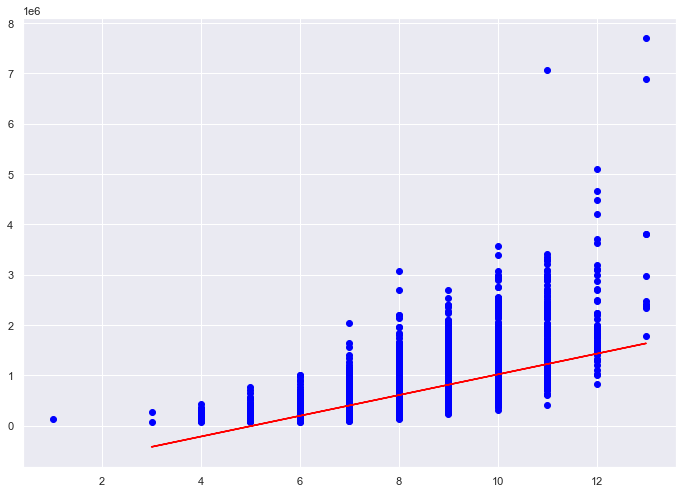

In [129]:
plt.scatter(X_train,Y_train, color='blue')
plt.plot(X_test, Y_pred, color='red')

### Feature Selection

In [243]:
import statsmodels.formula.api as smf
myModel1 = smf.ols(formula = "price ~ bedrooms + bathrooms + sqft_living + floors + waterfront + view + grade + sqft_above + sqft_basement + lat + sqft_living15 + yr_renovated", data=df)
result1 = myModel1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     3856.
Date:                Sat, 10 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:01:39   Log-Likelihood:            -2.9586e+05
No. Observations:               21613   AIC:                         5.918e+05
Df Residuals:                   21601   BIC:                         5.918e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.235e+07   5.08e+05    -63.706      0.000   -3.33e+07   -3.14e+07
bedrooms      -2.791e+04   1968.733    -14.177      0.000   -3.18e+04   -2.41e+04
bathrooms      2.288e+04   2990.034      7.652      0.000     1.7e+04    2.87e+04
sqft_living     119.3577      2.298     51.930      0.000     114.853     123.863
floors        -3.979e+04   3573.089    -11.136      0.000   -4.68e+04   -3.28e+04
waterfront     5.873e+05   1.84e+04     31.932      0.000    5.51e+05    6.23e+05
view           6.493e+04   2225.334     29.176      0.000    6.06e+04    6.93e+04
grade           8.08e+04   2191.395     36.873      0.000    7.65e+04    8.51e+04
sqft_above       62.3903      2.314     26.966      0.000      57.855      66.925
sqft_basement    56.9674      2.675     21.298      0.000      51.725      62.210
lat             6.72e+05   1.07e+04     62.756      0.000    6.51e+05    6.93e+05
sqft_living15     8.9773      3.541      2.535      0.011       2.037      15.918
yr_renovated     57.1999      3.656     15.644      0.000      50.033      64.367
==============================================================================
Omnibus:                    17948.969   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1518709.226
Skew:                           3.489   Prob(JB):                         0.00
Kurtosis:                      43.469   Cond. No.                     1.12e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.31e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [244]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                          for i in range(len(features.columns))]
print(vif_data)

c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


          feature           VIF
0        bedrooms  2.275954e+01
1       bathrooms  1.610123e+01
2     sqft_living           inf
3          floors  1.658197e+01
4      waterfront  1.212763e+00
5            view  1.551947e+00
6           grade  1.467263e+02
7      sqft_above           inf
8   sqft_basement           inf
9             lat  1.389157e+05
10  sqft_living15  2.706834e+01
11   yr_renovated  1.185869e+00
12      condition  3.455790e+01
13           long  1.351928e+06
14       yr_built  8.863955e+03
15       sqft_lot  1.240260e+00
16        zipcode  1.620667e+06


so here i used the filtred method to choose the right features this mehod is called Variance Inflation Factor(VIF) , it gives us information about Collinearity of the dataset which is the state where two variables are highly correlated and contain similar information about the variance within a given dataset.
* `sqft_above` and `sqft_basement`  and `sqft_living` are highly correlated
* i chosed to drope sqft_above and sqft_basement and keep sqft_living because it gave me good results with linear regression 

In [263]:
# here are the features am selecting
features = df[["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view", "grade",
 "lat", "sqft_living15","yr_renovated","condition","long","yr_built","sqft_lot","zipcode"]]

### Testing with diffrent Algorithms

In [259]:
X = features
Y = df["price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)


In [260]:
from sklearn.preprocessing import PolynomialFeatures
def modelCreation(type,X_train,Y_train,X_test,Y_test):
    
    if(type == "multiple linear regression"):
        lr = LinearRegression()
        lr.fit(X_train,Y_train)
        Y_pred = lr.predict(X_test)
        r_sq = metrics.r2_score(Y_test,Y_pred)
        rmse1 = np.sqrt(metrics.mean_squared_error(Y_train, lr.predict(X_train)))
        return r_sq
    
    if(type == "polynomial regression"):
        degree=2
        poly_model = PolynomialFeatures(degree=degree)
        poly_x_values = poly_model.fit_transform(X_train)
        poly_model.fit(poly_x_values, Y_train)
        regression_model = LinearRegression()       
        regression_model.fit(poly_x_values, Y_train)
        Y_pred = regression_model.predict(poly_x_values)
        r_sq = metrics.r2_score(Y_train,Y_pred)
        return r_sq 
    
    if(type == "Ridge regression"):
        #instantiate Ridge model 
        model = Ridge()
        model.fit(X_train,Y_train)
        #check the score of the Ridge model on test data
        r_sq = model.score(X_test,Y_test)
        return r_sq
    
    if (type == "RandomForestRegressor"):
        rf = RandomForestRegressor()
        rf.fit(X_train, Y_train)
        r_sq = rf.score(X_test,Y_test)
        return r_sq
    

In [261]:
report = pd.DataFrame()
r_sq_rf = modelCreation("RandomForestRegressor",X_train,Y_train,X_test,Y_test)
r_sq_rr = modelCreation("Ridge regression",X_train,Y_train,X_test,Y_test)
r_sq_pr = modelCreation("polynomial regression",X_train,Y_train,X_test,Y_test)
r_sq_ml = modelCreation("multiple linear regression",X_train,Y_train,X_test,Y_test)
report["Models"] = ["multiple linear regression","polynomial regression","Ridge regression","RandomForestRegressor"]
report["score"] = [r_sq_ml , r_sq_pr , r_sq_rr , r_sq_rf ]


In [257]:
report

,Models,score
0,multiple linear regression,0.711098
1,polynomial regression,0.825752
2,Ridge regression,0.711194
3,RandomForestRegressor,0.881147


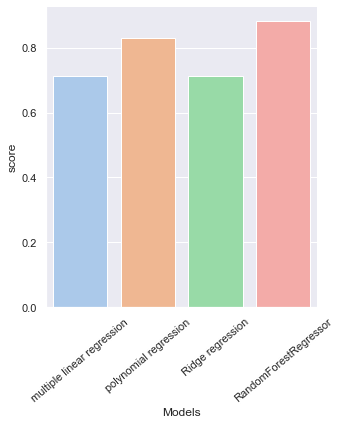

In [223]:

f = sns.catplot(data=report, x="Models",y="score",kind="bar",palette="pastel")
f.set_xticklabels(rotation=40)